Name: Alexandra Brun Coronado
Code: 20203435

In [ ]:
I. CODE SECTION

In [1]:
import pandas as pd
import seaborn as sns

Part 1: Replicate figure 3 of Acemoglu et al 2001

In [2]:
filename = 'acemoglu_2001.csv'
data = pd.read_csv('acemoglu_2001.csv')

In [3]:
data.head()

,longname,shortnam,logmort0,risk,loggdp,campaign,source0,slave,latitude,neoeuro,...,logmortjam,logmortcap250,logmortjam250,wandcafrica,malfal94,wacacontested,mortnaval2250,logmortnaval2250,mortnaval1250,logmortnaval1250
0,Bangladesh,BGD,4.268438,5.140000,6.88,1,1,0,0.2667,0,...,4.268438,4.268438,4.268438,0,0.12008,0,71.410004,4.268438,71.410004,4.268438
1,Canada,CAN,2.778819,9.729999,9.99,0,1,0,0.6667,1,...,2.778819,2.778819,2.778819,0,0.00000,0,16.100000,2.778819,16.100000,2.778819
2,Congo,COG,5.480639,4.680000,7.42,0,1,1,0.0111,0,...,5.480639,5.480639,5.480639,1,0.95000,0,240.000000,5.480639,240.000000,5.480639
3,Algeria,DZA,4.359270,6.500000,8.39,1,1,0,0.3111,0,...,4.359270,4.359270,4.359270,0,0.00000,0,78.199997,4.359270,78.199997,4.359270
4,Egypt,EGY,4.216562,6.770000,7.95,1,1,0,0.3000,0,...,4.216562,4.216562,4.216562,0,0.00000,0,67.800003,4.216562,67.800003,4.216562


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longname          28 non-null     object 
 1   shortnam          28 non-null     object 
 2   logmort0          28 non-null     float64
 3   risk              28 non-null     float64
 4   loggdp            28 non-null     float64
 5   campaign          28 non-null     int64  
 6   source0           28 non-null     int64  
 7   slave             28 non-null     int64  
 8   latitude          28 non-null     float64
 9   neoeuro           28 non-null     int64  
 10  asia              28 non-null     int64  
 11  africa            28 non-null     int64  
 12  other             28 non-null     int64  
 13  edes1975          28 non-null     float64
 14  campaignsj        28 non-null     int64  
 15  campaignsj2       28 non-null     int64  
 16  mortnaval1        28 non-null     float64
 17 

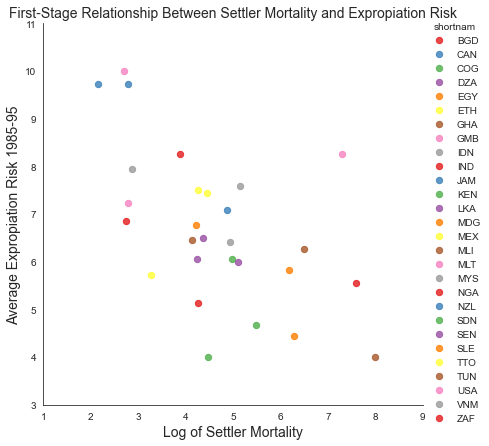

In [90]:
sns.set_style('white')
gridobj = sns.lmplot(x = "logmort0", y = "risk",
                   data = data,
                   height = 6,
                   robust = True,
                   fit_reg = True,
                   hue = "shortnam",
                   scatter_kws = dict(s = 40),
                   line_kws = dict (lw = 40),
                   palette = 'Set1', )

plt.xlabel('Log of Settler Mortality', fontsize = 14)
plt.ylabel('Average Expropiation Risk 1985-95', fontsize = 14)
plt.title('First-Stage Relationship Between Settler Mortality and Expropiation Risk', fontsize = 14, loc = 'center')

gridobj.set(xlim=(1, 9), ylim=(3, 11))
plt.show()

- Unfortunately, I was not able to show the line on the graph, but you can still see that there is a negative relationship between the two variables. This means that in the countries that were colonies where Europeans faced high mortality rates, they currently have worse institutions.
- Likewise, it can be observed that the dispersion of the data is medium.
- It can be seen that the highest concentration of countries occurs in a mortality rate between 4 and 6, and an average expropriation risk rate between 5 and 8.
- The case of Gambia stands out, isolated from the rest of the countries, where the mortality rate and the average expropriation risk rate are similar, that is, it does not seem to be an example of the inverse relationship between the variables studied.

Part 2: Replicate table 2 of the paper

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filename = 'acemoglu_2001_regression.csv'
data2 = pd.read_csv('acemoglu_2001_regression.csv')

In [6]:
data2.head()

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
0,AFG,0,0.366667,NaN,NaN,0,1,NaN,NaN
1,AGO,1,0.136667,5.363637,7.770645,0,0,-3.411248,1.0
2,ARE,0,0.266667,7.181818,9.804219,0,1,NaN,NaN
3,ARG,0,0.377778,6.386363,9.133459,0,0,-0.872274,1.0
4,ARM,0,0.444444,NaN,7.682482,0,1,NaN,NaN


In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_1 = 'logpgp95 ~ avexpr'
results_1= smf.ols(model_1, data=data2).fit(cov_type='HC1')

In [29]:
model_2 = 'logpgp95 ~ avexpr'
results_2 = smf.ols(model_2, data=data2[data2['baseco'] == 1.0]).fit(cov_type='HC1')

In [30]:
model_3 = 'logpgp95 ~ avexpr + lat_abst'
results_3 = smf.ols(model_3, data=data2).fit(cov_type='HC1')

In [31]:
model_4 = 'logpgp95 ~ avexpr + lat_abst + africa + asia + other'
results_4 = smf.ols(model_3, data=data2).fit(cov_type='HC1')

In [32]:
model_5 = 'logpgp95 ~ avexpr + lat_abst'
results_5 = smf.ols(model_2, data=data2[data2['baseco'] == 1.0]).fit(cov_type='HC1')

In [33]:
model_6 = 'logpgp95 ~ avexpr + lat_abst + africa + asia + other'
results_6 = smf.ols(model_3, data=data2[data2['baseco'] == 1.0]).fit(cov_type='HC1')

In [34]:
model_7 = 'logpgp95 ~ loghjypl'
results_7 = smf.ols(model_1, data=data2).fit(cov_type='HC1')

In [41]:
model_8 = 'logpgp95 ~ loghjypl'
results_8 = smf.ols(model_2, data=data2[data2['baseco'] == 1.0]).fit(cov_type='HC1')

In [40]:
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

stargazer = Stargazer([results_1,results_2,results_3,results_4,results_5,results_5,results_6,results_7,results_8])
HTML(stargazer.render_html())

ModuleNotFoundError: No module named 'stargazer'

- There is a strong correlation between the measure of institutions (average protection against expropriation) and income per capita. 
- The R2 of the regression in the first column indicates that over 50 percent of the variation in income per capita is associated with variation in this index of institutions (average protection against expropriation risk).
- Although protection against expropriation risk remains significant, in columns 4 and 6 we can see that the continent dummies are also statistically significant.

II. REPORT

Normally, minimum wage policies are established with a distributive purpose, this is to improve the situation of low-income workers. However, at an empirical level, numerous papers around the world have shown that there is no conclusive evidence on the effects of the minimum wage on labor market variables. Despite the vast academic literature, from time to time the issue of raising the minimum wage returns to public discussion under the presumption of its supposed socially desirable effects. Peru is no stranger to this phenomenon. In the country, during the decade 2000-2010, there were five increases in the Minimum Living Remuneration. These increases occurred at different time intervals and at different rates, without any specific pattern. It is in this context that the paper seeks to assess the effects of the increase in the minimum wage on two of the most important variables in the labor market: income and employment. The researcher uses data from the 2000-2010 decade in Peru. The paper concludes that the active policy of minimum wages is not a potentially effective tool as an instrument to promote social inclusion. The effects on wages are, in the best scenario, statistically weak (great dispersion) and of minimal magnitude (30% of the increase) for formal workers who earned between 0.9 and 1.2 Minimum Vital Wages before the increase and who manage to keep their jobs. Likewise, it was observed that the higher the Minimum Vital Remuneration is, respect to the average salary, the more the rule was breached. 

As for the strengths, four can be found. First, the methodology used by the researcher (descriptive tabulations, salary distribution analysis and econometric analysis) allows an in-depth analysis of all the possible variations of the Minimum Living Remuneration that occurred during the 2000-2010 decade. Second, that the author has used longitudinal data, since it facilitates the observation of changes in the income and employment of individuals affected and not affected by changes in the minimum wage. Third, the fact that the effects in the formal and informal sectors have been analyzed stands out. Finally, I highlight that the paper has explained the conceptual aspects that explain the labor market model and the effects of the minimum wage on it. On the other hand, regarding the weaknesses of the research, it can be argued that the data on informality is not very reliable at a general level. This is because statisticians on informality are difficult to identify due to their mobility and lack of visibility of this phenomenon. Another possible weakness of the paper is that the analysis focuses on the Lima region. 

In the first place, this document stands out because it contributes to filling an academic void in the country. This is because at the time this research was published, in Peru studies on the effects of the minimum wage were few; In addition, most of the works were focused on the increase in the Minimum Vital Remuneration that occurred in September 2003, while Jaramillo's research covers a whole decade. Secondly, another important contribution of this document is to offer evidence on the particular case of Peru, a country where the policy of improving remuneration is constantly used for political purposes. Unfortunately, the possible effects on employment and informality that an increase in the Minimum Vital Remuneration would have are not observable in the short term. For this reason, increases in the minimum wage have become a tool used by politicians to reduce popular discontent. Investigations such as Jaramillo's make evidence available to citizens to demonstrate that the policy of increasing the Minimum Vital Remuneration does not meet the purpose of social inclusion. Finally, another contribution of this document is that it exposes the country's problems that must be analyzed in greater depth. For example, it states that the people most affected by the minimum wage are rural residents, youth and women; also, that there is an enormous heterogeneity in the levels of productivity in the different regions of the country; and that there is a high rate of non-compliance throughout the territory. 

In relation to what was mentioned in the previous paragraph, an important step to follow would be to evaluate whether or not a Minimum Life Remuneration differentiated by region would have effects on the variables studied in the labor market. Because in many regions of the country the RMV is not a salary floor, any increase in it becomes voluntary, that is, it has no effect. On the other hand, another step to follow could be to explore the costs that employers have to keep a worker in the formal sector, in order to analyze possible ways to reduce the level of informal sector in the country. Finally, it would be interesting to evaluate what alternatives can be applied to make young women and rural residents who are the most affected by minimum wages less vulnerable. 